### This is a neural network to predict the synthesis time of Metal-Organic Frameworks based on electronic configurations, metal types, oxidation states, and synthesis temperature. Dataset is from [kaggle](https://www.kaggle.com/datasets/marquis03/metal-organic-frame-materials-prediction/data)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv("finger_train.csv")
data_test = pd.read_csv("finger_test.csv") #will serve as new, unseen dataset to test our model

In [3]:
data_train.head()

,mof,1s,2s,3s,4s,5s,6s,7s,2p,3p,...,4d,5d,6d,4f,5f,metal,linker1smi,oxidation_state,temperature,time
0,WIRMOB_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,O=C(O)c1ccc(COc2c3c(c(OCc4ccc(C(=O)O)cc4)c4c2C...,2,110,72.0
1,VIXTUT_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,c1cc(CCc2ccncc2)ccn1,2,85,72.0
2,PODKUQ_clean,2,2,2,1,0,0,0,6,6,...,0,0,0,0,0,Cu,O=C(O)c1cc(C(=O)O)cc(-n2cc(-c3ccc(-c4cc(-c5ccc...,2,80,24.0
3,IKUTOZ_clean,2,2,2,2,2,2,0,6,6,...,10,0,0,10,0,Dy,O=C(O)c1c2ccccc2c(C(=O)O)c2ccccc12,3,95,24.0
4,LADHEF_clean,2,2,2,2,0,0,0,6,6,...,0,0,0,0,0,Zn,c1nnc[nH]1,2,80,72.0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mof              560 non-null    object 
 1   1s               560 non-null    int64  
 2   2s               560 non-null    int64  
 3   3s               560 non-null    int64  
 4   4s               560 non-null    int64  
 5   5s               560 non-null    int64  
 6   6s               560 non-null    int64  
 7   7s               560 non-null    int64  
 8   2p               560 non-null    int64  
 9   3p               560 non-null    int64  
 10  4p               560 non-null    int64  
 11  5p               560 non-null    int64  
 12  6p               560 non-null    int64  
 13  3d               560 non-null    int64  
 14  4d               560 non-null    int64  
 15  5d               560 non-null    int64  
 16  6d               560 non-null    int64  
 17  4f              

In [5]:
#The type of metal-organic framework is not exactly a synthesis parameter that affects the synthesis time and route. This column could well be dropped and not passed into our network

data_train = data_train.drop("mof", axis = 1)

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1s               560 non-null    int64  
 1   2s               560 non-null    int64  
 2   3s               560 non-null    int64  
 3   4s               560 non-null    int64  
 4   5s               560 non-null    int64  
 5   6s               560 non-null    int64  
 6   7s               560 non-null    int64  
 7   2p               560 non-null    int64  
 8   3p               560 non-null    int64  
 9   4p               560 non-null    int64  
 10  5p               560 non-null    int64  
 11  6p               560 non-null    int64  
 12  3d               560 non-null    int64  
 13  4d               560 non-null    int64  
 14  5d               560 non-null    int64  
 15  6d               560 non-null    int64  
 16  4f               560 non-null    int64  
 17  5f              

In [7]:
#The metal colum is categorical and thus would require a bit of transformation

data_train["metal"].nunique()

21

In [8]:
dummies_for_metal = pd.get_dummies(data_train["metal"], drop_first=True)
data_train = data_train.drop("metal", axis = 1)
data_train = pd.concat([data_train, dummies_for_metal], axis = 1)

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 42 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   1s               560 non-null    int64  
 1   2s               560 non-null    int64  
 2   3s               560 non-null    int64  
 3   4s               560 non-null    int64  
 4   5s               560 non-null    int64  
 5   6s               560 non-null    int64  
 6   7s               560 non-null    int64  
 7   2p               560 non-null    int64  
 8   3p               560 non-null    int64  
 9   4p               560 non-null    int64  
 10  5p               560 non-null    int64  
 11  6p               560 non-null    int64  
 12  3d               560 non-null    int64  
 13  4d               560 non-null    int64  
 14  5d               560 non-null    int64  
 15  6d               560 non-null    int64  
 16  4f               560 non-null    int64  
 17  5f              

In [10]:
#We could create molecular objects for linker1smi structural string expressions

from rdkit.Chem import PandasTools
PandasTools.AddMoleculeColumnToFrame(data_train, smilesCol='linker1smi', molCol='ROMol')

In [11]:
data_train.head()

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,Na,Ni,Rb,Tb,Th,Y,Yb,Zn,Zr,ROMol
0,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,0,0,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000249AC2...
1,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,0,0,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000249AC2...
2,2,2,2,1,0,0,0,6,6,0,...,0,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x00000249AC2...
3,2,2,2,2,2,2,0,6,6,6,...,0,0,0,0,0,0,0,0,0,<rdkit.Chem.rdchem.Mol object at 0x00000249AC2...
4,2,2,2,2,0,0,0,6,6,0,...,0,0,0,0,0,0,0,1,0,<rdkit.Chem.rdchem.Mol object at 0x00000249AC5...


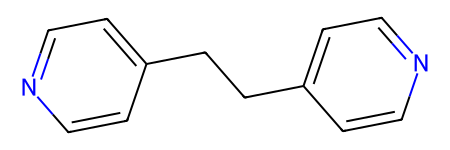

In [12]:
#First, let's do a little visualization of the objects that were created


data_train["ROMol"][1]

In [13]:
from rdkit.Chem import rdFingerprintGenerator

In [14]:
#Could be easy now to get fingerprints for our generated objects

fingerprints = []
fpgenerator = rdFingerprintGenerator.GetRDKitFPGenerator(maxPath = 7, fpSize = 32) #we try to keep the fingerprint size minimum because of storage memory

for mol in data_train["ROMol"]:
    fpvec = fpgenerator.GetFingerprint(mol)
    fparray = np.array(fpvec)
    fingerprints.append(fparray)

In [15]:
data_train = pd.concat([data_train, pd.DataFrame(fingerprints)], axis = 1)

In [16]:
data_train.head()

,1s,2s,3s,4s,5s,6s,7s,2p,3p,4p,...,22,23,24,25,26,27,28,29,30,31
0,2,2,2,2,0,0,0,6,6,0,...,1,1,1,1,1,1,1,1,1,1
1,2,2,2,2,0,0,0,6,6,0,...,1,1,1,1,1,1,1,1,1,1
2,2,2,2,1,0,0,0,6,6,0,...,1,1,1,1,1,1,1,1,1,1
3,2,2,2,2,2,2,0,6,6,6,...,1,1,1,1,1,1,1,1,1,1
4,2,2,2,2,0,0,0,6,6,0,...,0,0,1,0,1,1,1,1,0,0


In [17]:
#The generated fingerprints is enough representation of the linker1smi column and this column can be excluded from our training

data_train = data_train.drop(["linker1smi", "ROMol"], axis = 1)

In [18]:
data_train.columns

Index([             '1s',              '2s',              '3s',
                    '4s',              '5s',              '6s',
                    '7s',              '2p',              '3p',
                    '4p',              '5p',              '6p',
                    '3d',              '4d',              '5d',
                    '6d',              '4f',              '5f',
       'oxidation_state',     'temperature',            'time',
                    'Co',              'Cu',              'Dy',
                    'Eu',              'Fe',              'Gd',
                    'In',               'K',              'La',
                    'Mg',              'Mn',              'Na',
                    'Ni',              'Rb',              'Tb',
                    'Th',               'Y',              'Yb',
                    'Zn',              'Zr',                 0,
                       1,                 2,                 3,
                       4,               

### Our data set now seems to be ready for passing into a neural network for training

In [19]:
X = data_train.drop("time", axis = 1).values

y = data_train["time"].values

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

In [24]:
X_train.shape

(420, 72)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [45]:
#Initialize model
model = Sequential()

#Input layer
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
            
#Hidden layer 1
model.add(Dense(256//2, activation = "relu"))
model.add(Dropout(0.4))
            
#Hidden layer 2
model.add(Dense(256//4, activation = "relu"))
model. add(Dropout(0.4))

#Hidden layer 3
model.add(Dense(256//8, activation = "relu"))
model. add(Dropout(0.4))

#Output layer
model.add(Dense(1))
            
#Compile model
model.compile(optimizer = "adam", loss = "mean_squared_error")           



In [46]:
#fitting model
model.fit(x = X_train, y = y_train, epochs = 100, batch_size = 32, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 7874.5669 - val_loss: 6082.1567
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6262.8447 - val_loss: 2713.7083
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3633.2610 - val_loss: 2957.2019
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5323.7886 - val_loss: 2961.1694
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4239.3145 - val_loss: 2703.2788
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5941.2310 - val_loss: 2769.2332
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3881.8994 - val_loss: 3002.2749
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3411.8240 - val_loss: 2710.2546
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4188.4697 - val_loss: 2743.1353
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4037.7444 - val_loss: 2659.3953
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6002.4614 - val_loss: 2810.3

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3709.6738 - val_loss: 2393.9492
Epoch 67/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3149.8164 - val_loss: 2466.8560
Epoch 68/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4362.4243 - val_loss: 2384.2761
Epoch 69/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3464.1006 - val_loss: 2492.7878
Epoch 70/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3736.3848 - val_loss: 2456.6021
Epoch 71/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5513.6899 - val_loss: 2403.6296
Epoch 72/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3680.1299 - val_loss: 2564.3086
Epoch 73/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3273.0735 - val_loss: 2410.1189
Epoch 74/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2804.9365 - val_loss: 2517.7085
Epoch 75/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3587.3679 - val_loss: 2404.1550
Epoch 76/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3618.3564 - val_loss: 2492.2498
E

<AxesSubplot:>

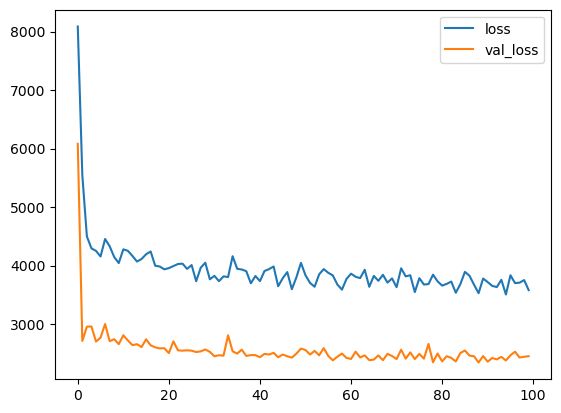

In [47]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [48]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


In [49]:
print("mean squared error is", mean_squared_error(y_test, predictions))
print("\n")
print("mean absolute error is", mean_absolute_error(y_test, predictions))

mean squared error is 2452.9326982130747


mean absolute error is 31.94200826372419


In [50]:
y_test = y_test.reshape(len(y_test), 1)
y_test.shape

(140, 1)

In [51]:
predictions = predictions.reshape(len(predictions), 1)
predictions.shape

(140, 1)

In [52]:
compare = np.concatenate((y_test, predictions), axis = 1)

In [53]:
type(compare)

numpy.ndarray

In [54]:
compare

array([[ 24.        ,  78.96495056],
       [240.        ,  52.66559601],
       [ 72.        ,  47.34283066],
       [120.        ,  63.89857101],
       [ 72.        ,  83.43531799],
       [ 96.        ,  81.06394958],
       [ 24.        ,  69.86615753],
       [ 48.        ,  54.22004318],
       [ 24.        ,  50.77531815],
       [ 72.        ,  54.22004318],
       [ 24.        ,  69.56756592],
       [ 72.        ,  68.1419754 ],
       [ 40.        ,  69.86615753],
       [240.        ,  72.96456909],
       [ 24.        ,  64.24355316],
       [ 72.        ,  68.1419754 ],
       [ 72.        ,  55.84944153],
       [ 72.        ,  51.66888428],
       [ 48.        ,  47.00390244],
       [ 72.        ,  63.48300552],
       [ 24.        ,  40.96704483],
       [ 72.        ,  68.57663727],
       [ 48.        ,  67.26688385],
       [ 72.        ,  50.77531815],
       [ 24.        ,  21.48153496],
       [144.        ,  50.54417038],
       [168.        ,  78.14820099],
 

##### The predicted values as well as the mean erros generated by the model seems quite off. There definitely would be need for adjustment of model parameters, evaluation of other model architectures, or even revision of data transformation sets